# Hola Oscar! <a class='tocSkip'></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Hola Oscar, ¿cómo estás? Espero que todo esté marchando bien de tu lado.

¡Felicitaciones por completar todos los ítems del notebook! Se nota el esfuerzo y dedicación que le has puesto. En líneas generales, el trabajo está bien enfocado y el código cumple con los objetivos planteados. Solo queda corregir el output de la función para evaluar los modelos y además agregar comentarios acerca de la exploración de la data. He dejado comentarios en rojo marcando los puntos a revisar.

Si surge alguna duda, puedes dejarla en un comentario azul y con gusto la responderé en la próxima revisión.

¡Saludos!


</div>

## Resumen de la revisión v2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2 </b> <a class="tocSkip"></a>

¡Felicitaciones Oscar! Hiciste un gran trabajo con las últimas correcciones. El notebook está completo y todo está en orden, por lo que tu proyecto queda aprobado. Lo que aprendiste y aplicaste aquí te servirá muchísimo en futuros desafíos de análisis de datos. ¡Mucho éxito!

Saludos.

</div>

----

# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto con setear estos parámetros al inicio del notebook para tener consistencia

</div>

## Cargar datos

Comentarios 2.

Carga del DF
Revisión general del DF
Revisión de datos del DF: A pesar de que trabajaremos con el corpus de texto, se revisaron los datos de las columnas, observando que la columna 'end_year' cuenta con un 95% de datos con valor \N, que podemor referiri como valores nulos por lo que no sería de ayuda importante en caso de análisis más a detalle. Mismo caso para 'is_adult', pues el valor "0" comprende el 99.99% de los datos.
Revisión del balance de clases de columna objetivo: Se observa que cuenta con un balance de prácticamente 50% - 50%.


In [4]:
# Carga del DF
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
# Revisión general del DF
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [6]:
# Revisión de datos del DF
df_reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164


In [7]:
# Revisión del balance de clases de columna objetivo
df_reviews['pos'].value_counts(normalize=True)

0    0.501046
1    0.498954
Name: pos, dtype: float64

## EDA

<a class='tocSkip'></a>
<div class='alert alert-block alert-info'>
<b>Se agregan comentarios de aección 3 EDA</b> <a class='tocSkip'></a>
</div>

Comentarios 3.

Se presentan los siguientes gráficos:

* Número de péliculas lanzadas a lo largo de los años: Debido a la evolución de la indrustria cinematográfica en número de lanzamientos por año supera el nivel de 50 a partir de 1968, cumpliendo con un rango de de aproximadamente 65 años. Posteriormente el crecimiento en el número de lanzamientos es inferior a 100 hasta 1989, reduciendo el rango de años para superar el nivel de 100 en tan solo 20 años, lo cual demuestra el crecimiento de la industria. Desde entonces se tiene un crecimiento de 50 lanzamientos más cada 4 años en promedio. A parttir de 2006 nuestro gráfico decrece, esto puede deberse a la falta de registros en nuestro DF (que se interrumpe en 2010) y no al declive de lanzamientos de la industria.
  
* Número de reseñas a lo largo de los años: En relación con el gráfico anterior, se aprecia que la actividad en cuanto a reseñas por año se mantiene debajo del nivel de 500 para los títulos lanzados anteriormente a 1979, a partir de dicho año y hasta 1995 se pueden superar las 1,000 reseñas por año de lanzamiento, independientemente de que la reseña sea negativa o positiva. La razón del decrecimiento en el dráfico puede deberse a lo señalado en el gráfico anterior.

* Gráfico de barras de #Reseñas por película y Gráfico KDE de #Reseñas por película: nos muestra la dispersión de las reseñas, observando que mayor número de películas tienen menos reseñas. El punto relevante se da en que el número de títulos al nivel de 30 reseñas se incrementa.

* El conjunto de entrenamiento. distribución de puntuaciones y El conjunto de prueba. distribución de puntuaciones: El primer punto a observar es que no existen puntuaciones de nivel 5 y 6 en una escala de 1 a 10. Siendo que las puntuaciones más fuertes recalan en las evaluaciones de 1 y 10 llegando casi a los 5,000 casos. el resto de puntuaciones se mantiene bajo los 3,000 casos. Ambos conjuntos de datos se comportan de igualmanera.

* El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año y El conjunto de entrenamiento: distribución de diferentes polaridades por película, El conjunto de prueba: número de reseñas de diferentes polaridades por año y El conjunto de prueba: distribución de diferentes polaridades por película: Muestra los datos como en Número de reseñas a lo largo de los años pero dividido por conjuntos, así como la distribución de la polaridad de las reseñas. Se aprecia que las reseñas negativas toman fuerza en los casos de títulos que son reseñados menos de 10 veces.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2 </b> <a class="tocSkip"></a>

Excelente, muy bien con las observaciones, muy completas
</div>

Veamos el número de películas y reseñas a lo largo de los años.

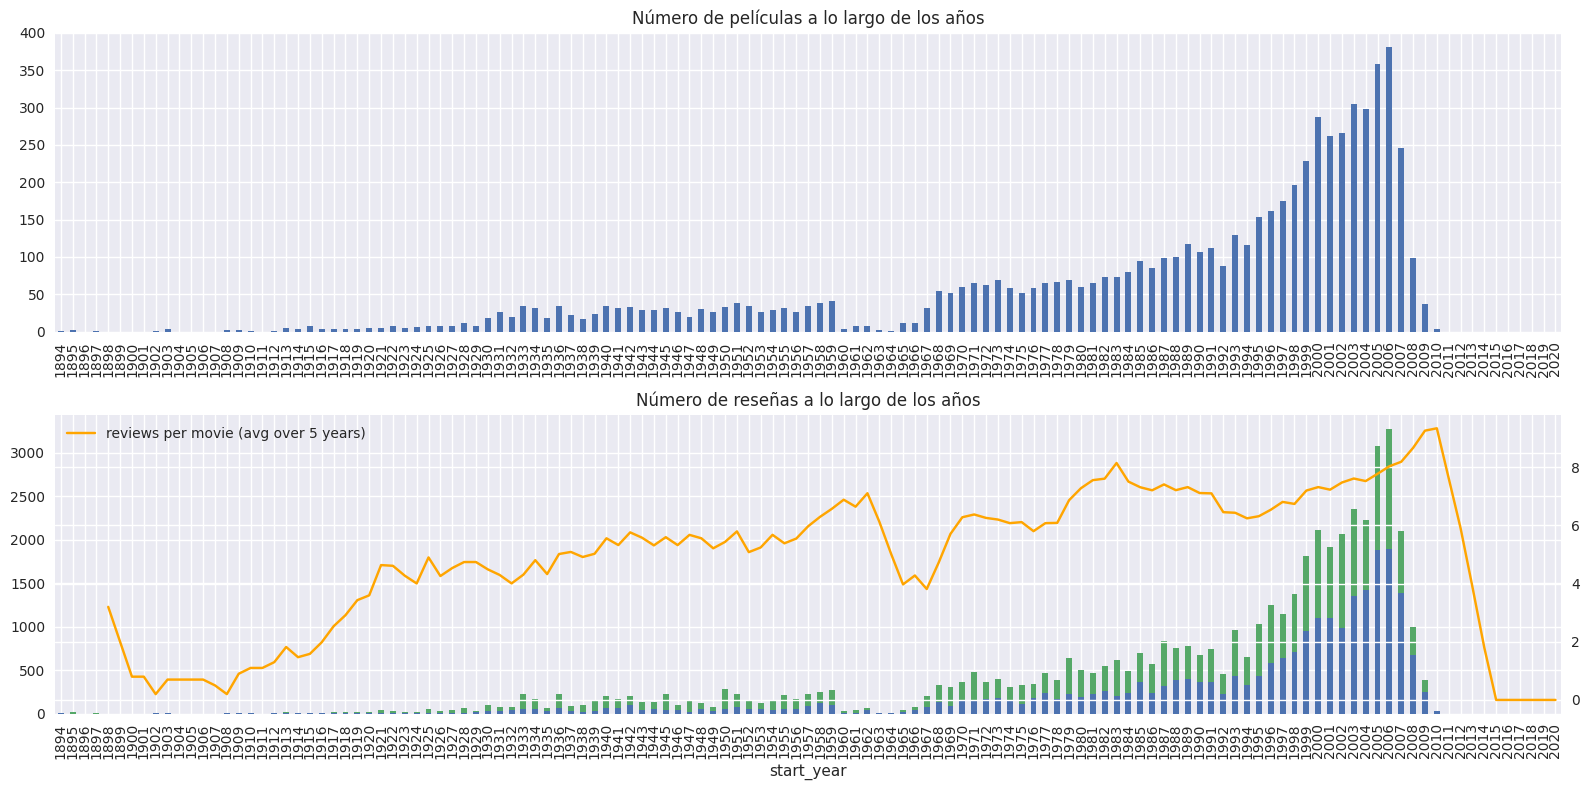

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

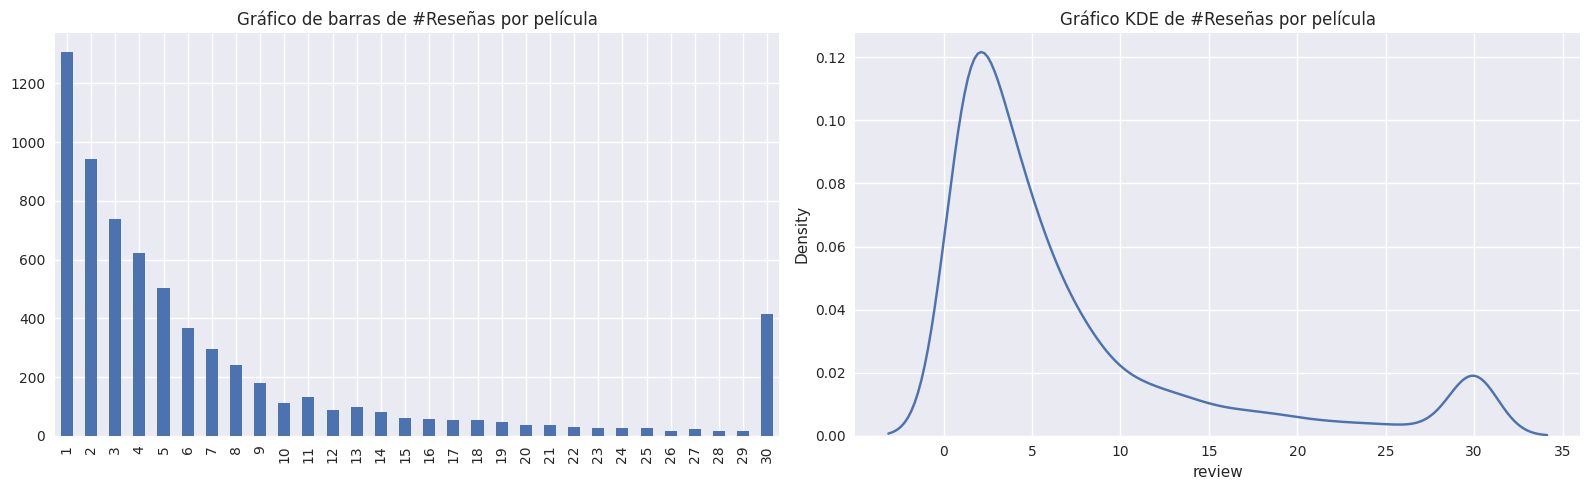

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

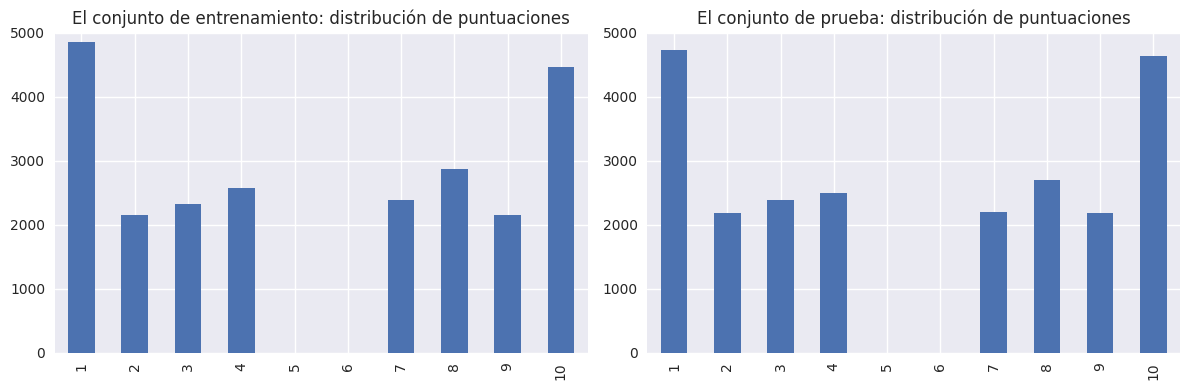

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


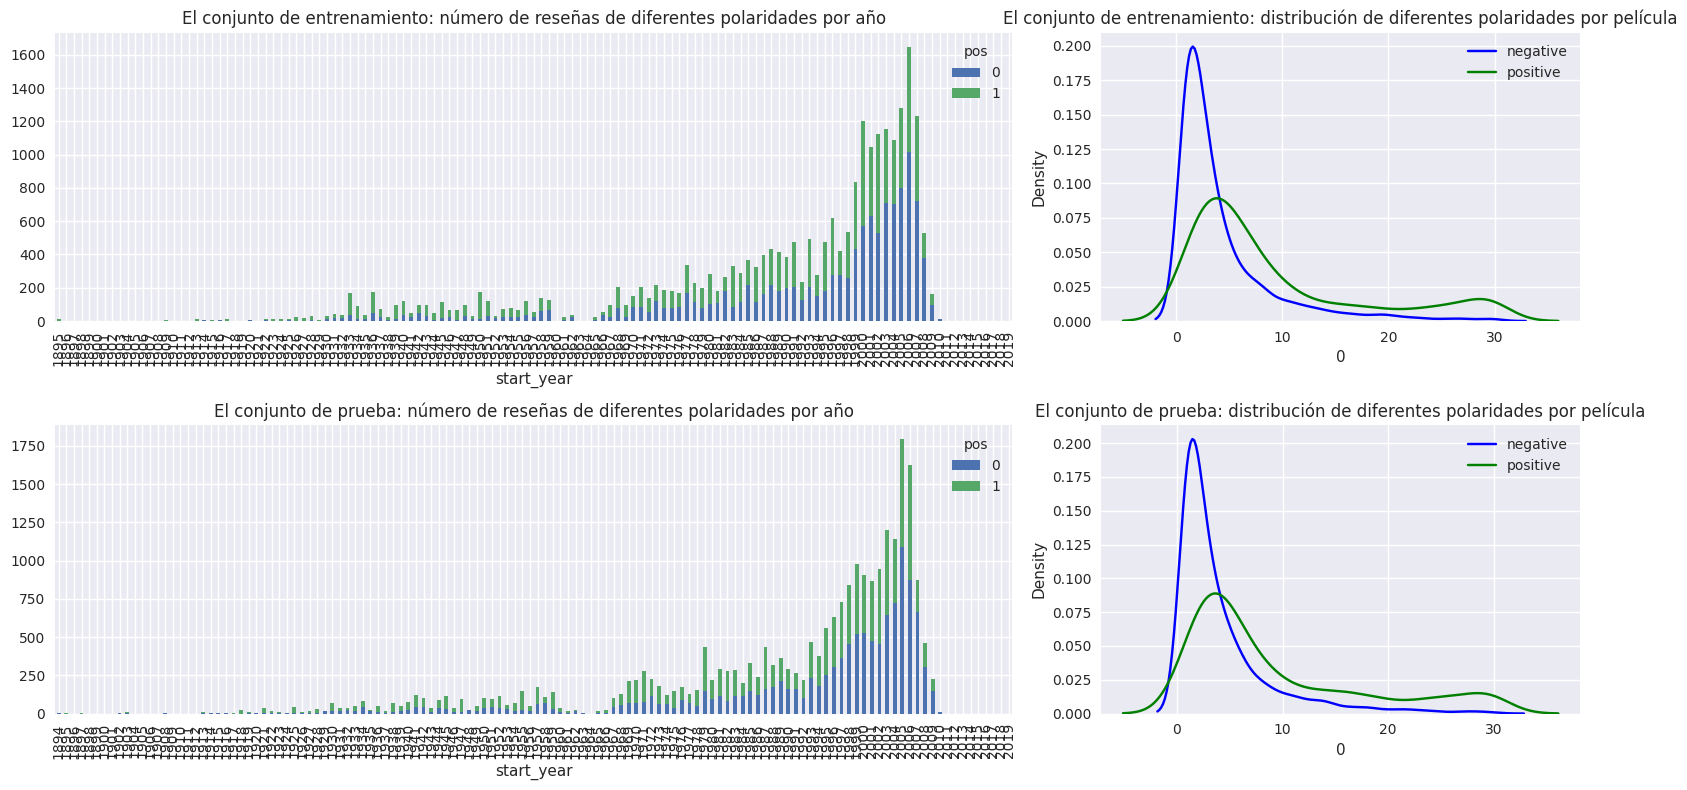

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo! Esta parte de exploración de la data y las características de las features está muy bien. Las múltiples visualizaciones permiten identificar los años de la data, su frecuencia y características. Nota además que hay una limitación de 30 reseñas por película.
    
Lo que falta en esta parte son comentarios o interpretaciones de estos gráficos. Como data-scientist, no solo basta con presentar una visualización sino que también es importante incluir un mensaje o recomendación.

</div>

## Procedimiento de evaluación

Comentarios 4.

Se define la función que ayudará a evaluar los modelos presentados

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [13]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
        
    return df_eval_stats

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ojo con la línea 
    
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
esta intenta reindexar `df_eval_stats` utilizando nombres incorrectos de las métricas, exactitud no existe ya que el output sale en inglés, por lo que el nombre correcto es Accuracy. Esto produce varios NaN en las filas de los resultados más adelante. 
    
Por otro lado, no estás retornando nada, al menos retorna el dataframe con las métricas por si es necesario.
    
    

</div>

<a class='tocSkip'></a>
<div class='alert alert-block alert-info'>
<b>Corrección de Accuracy realizada

Retorno de DF</b> <a class='tocSkip'></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2 </b> <a class="tocSkip"></a>

Bien hecho, corregido!

</div>

## Normalización

Comentarios 5.

Definición de corpus de texto, y conversión a minúsculas
Limpieza e textos, de caracteres que puedan afectar los textos
(La lematización se aplicará para cada modelo para efectos de probar 2 tipos de lematización)

In [14]:
# Definir el corpus de texto
corpus = df_reviews['review']

In [15]:
# Llevar a minúsculas el corpus
corpus = corpus.str.lower()

In [16]:
# Limpieza e textos
def text_cleaning (texts):
    text_clean = re.sub(r'[^a-z\']'," ",texts) # quitar caracter que no sea letra o "'"
    text_clean = re.sub(r'br '," ",text_clean) # quitar comando html de salto de línea
    text_clean = re.sub(r'<br />'," ",text_clean) # quitar comando html de salto de línea
    text_clean = re.sub(r'span '," ",text_clean) # quitar comando html de bloque
    # Quitar letras repetidas más de 3 veces
    letras = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    for letra in letras:
        patron = "{}".format(letra) + "{3,}"
        text_clean = re.sub(patron, letra, text_clean)
    text_clean = " ".join(text_clean.split())
    return text_clean

In [17]:
corpus_clean = corpus.apply(text_cleaning)

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [18]:
df_reviews['review_norm'] = corpus_clean # <escribe tu código aquí>

In [19]:
df_reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx,review_norm
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335,the pakage implies that warren beatty and gold...
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336,how the hell did they get this made presenting...
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489,there is no real story the film seems more lik...
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280,um a serious film about troubled teens in sing...
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281,i'm totally agree with garryjohal from singapo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038,this is another of my favorite columbos it spo...
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989,talk about being boring i got this expecting a...
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163,i never thought i'd say this about a biopic bu...
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164,spirit and chaos is an artistic biopic of miya...


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, así apreciamos la diferencia entre el original y el normalizado

</div>

## División entrenamiento / prueba

Comentarios 6.

División de DF a conjuntos de entrenamiento y prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [20]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Trabajar con modelos

Comentarios 7.

* Modelo 0 - Constante

Vectorización de textos

No se hace lematización ya que se hará un modelo Dummy como punto de partida mediante estratiegia constante con valor de "0".

El modelo no tiene un buen desempeño en cuanto a la predicción de datos, quedando muy por debajo del nivel requerido en la evaluación de F1.

* Modelo 1 - NLTK, TF-IDF y LR

Procesamiento de tokenización y lematización de textos mediante librería NLTK.

Definición de palabras vacías y vectorización de textos

Creación de modelo de regresión líneal y predicciones

Evaluación: Se cumple con el mínimo requerido de la métrica F1.

* Modelo 3 - spaCy, TF-IDF y LR

Procesamiento de tokenización y lematización de textos mediante librería spaCy.

Definición de palabras vacías y vectorización de textos

Creación de modelo de regresión líneal y predicciones

Evaluación: Se cumple con el mínimo requerido de la métrica F1.

* Modelo 4 - spaCy, TF-IDF y LGBMClassifier

Procesamiento de tokenización y lematización de textos mediante librería spaCy.

Definición de palabras vacías y vectorización de textos

Creación de modelo de Clasificador LGBM y predicciones

Evaluación: Se cumple con el mínimo requerido de la métrica F1.

* Modelo 9 - BERT

Declaración de variables de tokenizador, configuración y modelo Bert
Se define función para tokenizar textos, establecer máximos de tokens por frase, el desempeños del proceso, tensores e incrustaciones.

NOTA:
Debido a la complejidad en el proceso Bert se opta por hacer el proceso con 50 líneas de cada conjunto de datos. Esto con el fin de completar el proceso, sin embargo para la cantidad de datos observados no habrá una interpretación razónable.

En general los modelos con excepción del Dummy y BERT, se desempeñan de manera muy similar, cumpliendo con la métrica establecida.

### Modelo 0 - Constante

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

In [22]:
vect_tf_idf = TfidfVectorizer() # inicializar TfidVercorizer

In [23]:
tf_idf_cons = vect_tf_idf.fit_transform(df_reviews_train['review_norm'])

In [24]:
train_features_0 = tf_idf_cons # extraer características para el entrenamiento

In [25]:
test_features_0 = vect_tf_idf.transform(df_reviews_test['review_norm'])

In [26]:
constant_value = train_target.mode()[0]
model_0 = DummyClassifier(strategy="constant", constant=constant_value)
model_0.fit(train_features_0, train_target)
pred_test_0 = model_0.predict(test_features_0)

,train,test
Accuracy,0.5,0.5
F1,0.0,0.0
APS,0.5,0.5
ROC AUC,0.5,0.5


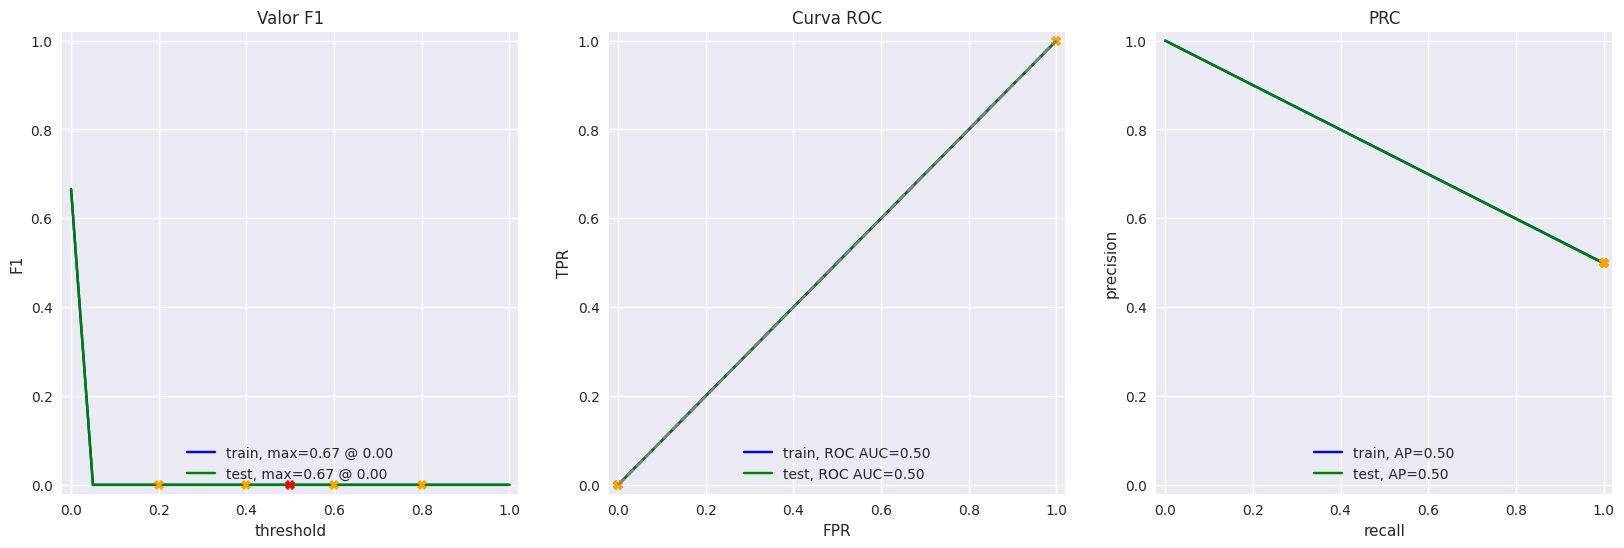

In [27]:
evaluate_model(model_0, train_features_0, train_target, test_features_0, test_target)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto! Así tenemos un baseline de comparación

</div>

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [28]:
import nltk

from sklearn.linear_model import LogisticRegression

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [29]:
lemmatizer  = WordNetLemmatizer()

In [30]:
def text_preprocessing_1(text):

    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
    return ' '.join(tokens)

In [31]:
train_corpus_nltk_lemm = df_reviews_train['review_norm'].apply(text_preprocessing_1) # extraer reseñas para lematizar con nltk para el entrenamiento

In [32]:
train_corpus_nltk_lemm

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made presenting...
7        this true story of carlson 's raider is more o...
8        should have been titled 'balderdash ' little i...
9        the movie 'gung ho ' the story of carlson 's m...
                               ...                        
47253    o my gosh just give me a minute to breath this...
47254    i ca n't tell you all how much i love this mov...
47255    legend of zu is possibly the most exciting mov...
47256    this movie is well done on so many level that ...
47257    a a history nut who is particularly interested...
Name: review_norm, Length: 23796, dtype: object

In [33]:
stop_words = set(stopwords.words('english'))  # definir las palabras vacías

In [34]:
count_tf_idf_1 = TfidfVectorizer(stop_words=stop_words) # inicializar TfidVercorizer

In [35]:
tf_idf_nltk = count_tf_idf_1.fit_transform(train_corpus_nltk_lemm) # ajustar y transformar el corpus de entrenamiento

In [36]:
train_features_1 = tf_idf_nltk # extraer características para el entrenamiento

In [37]:
test_corpus_nltk_lemm = df_reviews_test['review_norm'].apply(text_preprocessing_1) # extraer reseñas para lematizar con nltk para la prueba

In [38]:
test_features_1 = count_tf_idf_1.transform(test_corpus_nltk_lemm) # transformar el corpus de prueba

In [39]:
model_1 = LogisticRegression(random_state=12345, solver='liblinear') # inicializar el modelo de regresión logística y ajustarlo
model_1.fit(train_features_1, train_target)
pred_test_1 = model_1.predict(test_features_1) # obtener predicciones para la parte de prueba de los datos

,train,test
Accuracy,0.94,0.88
F1,0.94,0.88
APS,0.98,0.95
ROC AUC,0.98,0.95


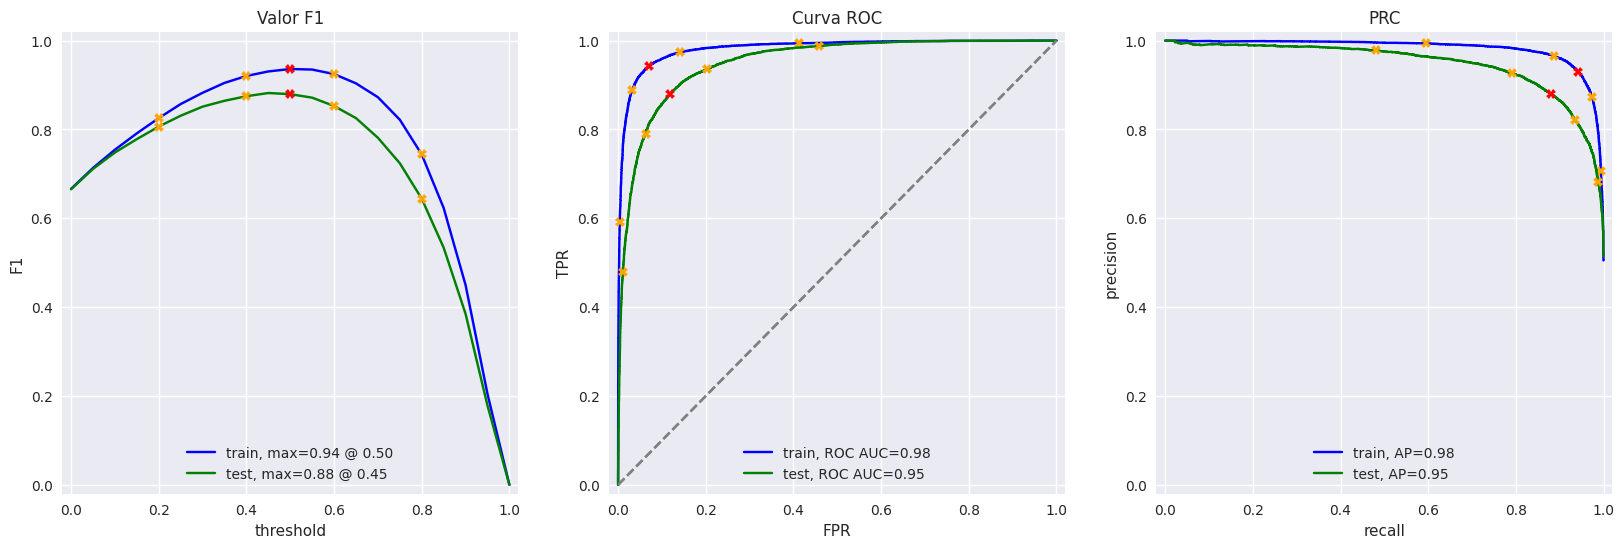

In [40]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

### Modelo 3 - spaCy, TF-IDF y LR

In [41]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [42]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [43]:

train_corpus_spacy_lemm = df_reviews_train['review_norm'].apply(text_preprocessing_3) # extraer reseñas para lematizar con spacy para el entrenamiento

In [44]:
train_corpus_spacy_lemm

0        the pakage imply that warren beatty and goldie...
1        how the hell do they get this make present its...
7        this true story of carlson 's raider be more o...
8        should have be title ' balderdash ' little in ...
9        the movie ' gung ho ' the story of carlson 's ...
                               ...                        
47253    o my gosh just give I a minute to breath this ...
47254    I can not tell you all how much I love this mo...
47255    legend of zu be possibly the most exciting mov...
47256    this movie be well do on so many level that I ...
47257    as a history nut who be particularly intereste...
Name: review_norm, Length: 23796, dtype: object

In [45]:
count_tf_idf_3 = TfidfVectorizer(stop_words=stop_words) # inicializar TfidVercorizer

In [46]:
tf_idf_spacy = count_tf_idf_3.fit_transform(train_corpus_spacy_lemm) # ajustar y transformar el corpus de entrenamiento

In [47]:
train_features_3 = tf_idf_spacy # extraer características para el entrenamiento

In [48]:
test_corpus_spacy_lemm = df_reviews_test['review_norm'].apply(text_preprocessing_3) # extraer reseñas para lematizar con spacy para la prueba

In [49]:
test_features_3 = count_tf_idf_3.transform(test_corpus_spacy_lemm) # transformar el corpus de prueba

In [50]:
model_3 = LogisticRegression(random_state=12345, solver='liblinear') # inicializar el modelo de regresión logística y ajustarlo
model_3.fit(train_features_3, train_target)
pred_test_3 = model_3.predict(test_features_3) # obtener predicciones para la parte de prueba de los datos

,train,test
Accuracy,0.93,0.88
F1,0.93,0.88
APS,0.98,0.95
ROC AUC,0.98,0.95


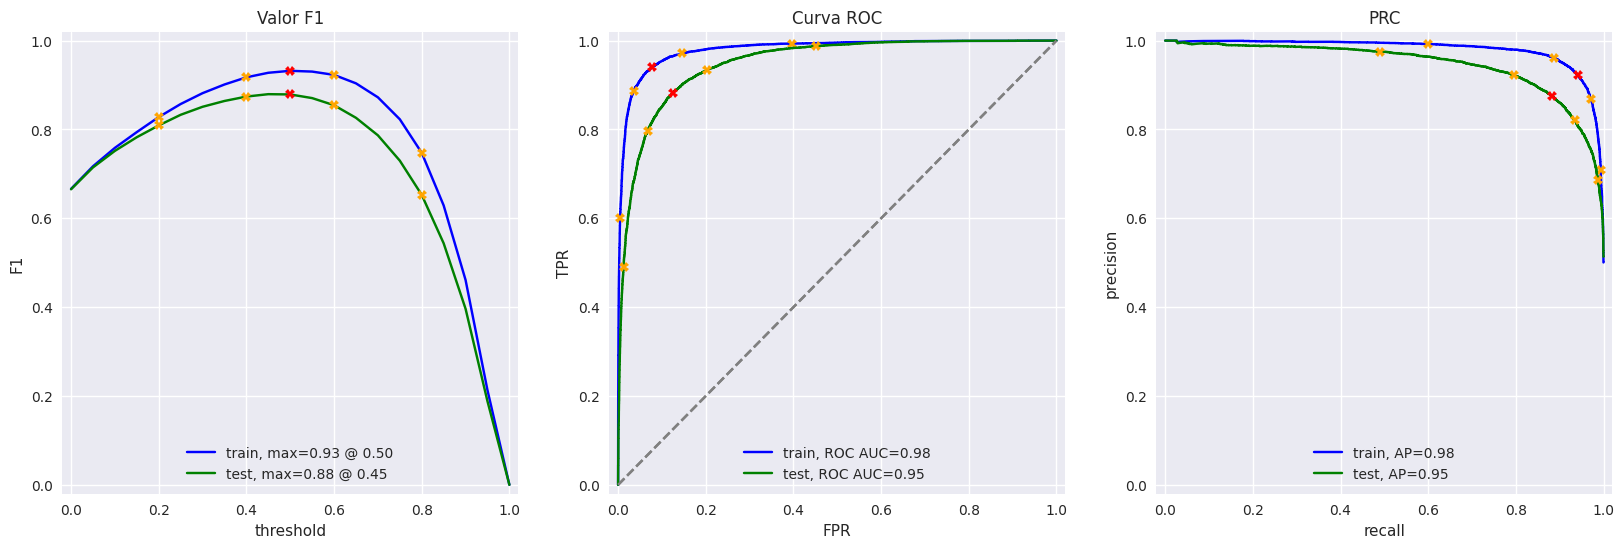

In [51]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [52]:
from lightgbm import LGBMClassifier

In [53]:
model_4 = LGBMClassifier() # inicializar el modelo de regresión logística y ajustarlo
model_4.fit(train_features_3, train_target)
pred_test_4 = model_4.predict(test_features_3) # obtener predicciones para la parte de prueba de los datos

,train,test
Accuracy,0.91,0.86
F1,0.91,0.86
APS,0.97,0.93
ROC AUC,0.97,0.94


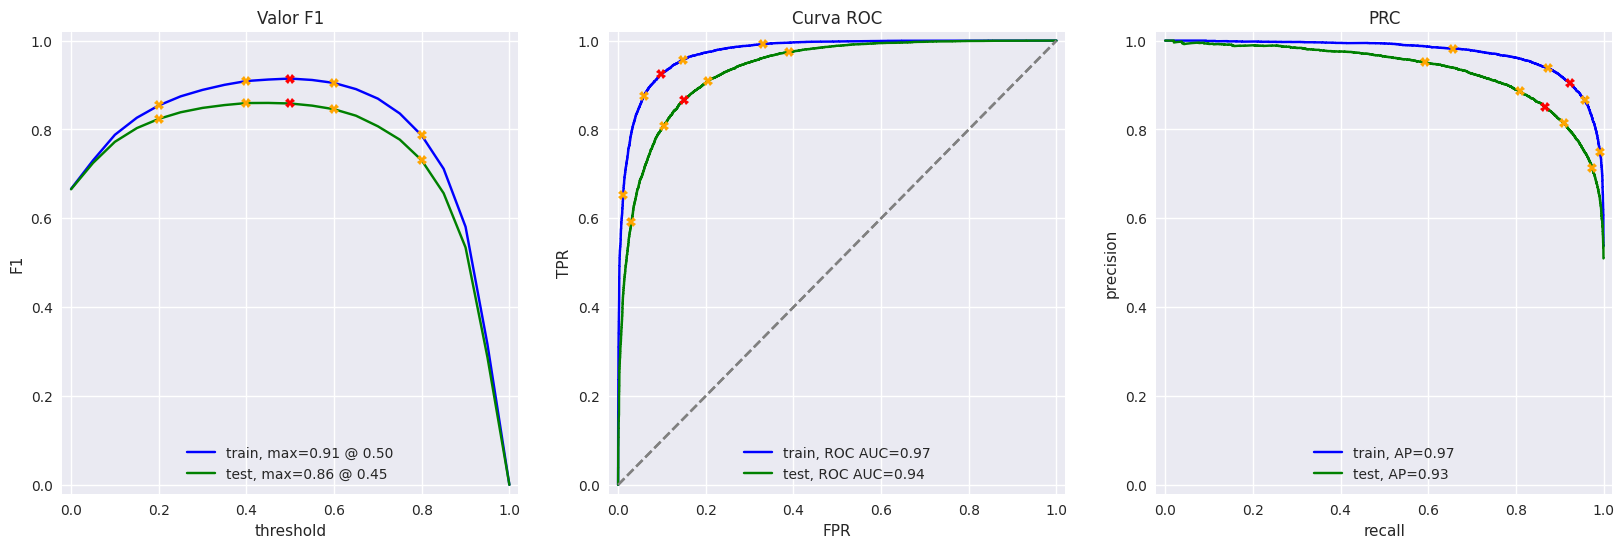

In [54]:
evaluate_model(model_4, train_features_3, train_target, test_features_3, test_target)

###  Modelo 9 - BERT

In [55]:
from sklearn.svm import SVC
import torch
import transformers
import logging

In [56]:
train_features_bert = df_reviews_train['review_norm'][:50]
test_features_bert = df_reviews_test['review_norm'][:50]
train_target_bert = df_reviews_train['pos'][:50]
test_target_bert = df_reviews_test['pos'][:50]

In [57]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [58]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # texto al id de relleno de tokens junto con sus máscaras de atención 
       
    # <escribe tu código aquí para crear ids_list y attention_mask_list>
    min_tokenized_text_length = 1e7  # Comience con un valor grande
    max_tokenized_text_length = 0    # Empezar con 0

    # Iterar a través de cada texto en la lista de entrada
    # <tu código aquí>
    for text in texts:

      # Suprimir las advertencias sobre salidas prolongadas del tokenizador. esto es util
      # para explorar la distribución de longitudes de texto *sin* truncamiento, pero
      # debe eliminarse o comentarse para un uso normal cuando se desea truncarlo.
      logging.getLogger("transformers.tokenization_utils").setLevel(logging.ERROR)

      # Tokenice el texto de entrada utilizando el tokenizador BERT.  Convertir a minúsculas
      # y agregue tokens especiales ([CLS] y [SEP]).
      ids = tokenizer.encode(text, add_special_tokens=True)

      # Calcule y actualice las longitudes mínimas y máximas de texto tokenizado.
      ids_len = len(ids)
      if ids_len < min_tokenized_text_length:
        min_tokenized_text_length = ids_len
        # <tu código aquí>
      elif ids_len > max_tokenized_text_length:
        max_tokenized_text_length = ids_len

      # Truncar los ID de los tokens si superan max_length.  Los modelos BERT tienen un límite
      # en la longitud de la secuencia de entrada.
      # <tu código aquí>
      n = max_length
      ids = ids[:n]

      # Rellene los ID de los tokens hasta max_length con 0.
      # <tu código aquí>
      padded = np.array(ids[:n] + [0]*(n - len(ids)))

      # Crea una máscara de atención. 1 para tokens reales, 0 para tokens de relleno.
      attention_mask = np.where(padded != 0, 1, 0)

      # Agregue las identificaciones acolchadas y la máscara de atención a sus respectivas listas.
      ids_list.append(padded)
      attention_mask_list.append(attention_mask)
    
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # obtener insertados en lotes
    
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <escribe tu código aquí para crear attention_mask_batch
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [59]:
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
train_features_9 = BERT_text_to_embeddings(train_features_bert)

Token indices sequence length is longer than the specified maximum sequence length for this model (543 > 512). Running this sequence through the model will result in indexing errors


Uso del dispositivo cpu.


  0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_423/831792743.py:66: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)


In [60]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

(23796,)
(50, 768)
(23796,)


In [61]:
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
test_features_9 = BERT_text_to_embeddings(test_features_bert)

Uso del dispositivo cpu.


  0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
# si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# y cargar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

In [63]:
# Df train con atributos con codificación BERT

df_train_features_9 = pd.DataFrame(train_features_9)
df_train_features_9.columns = ["Inc_" + str(x+1) for x in range(df_train_features_9.shape[1])]
df_train_features_9.head(5)

,Inc_1,Inc_2,Inc_3,Inc_4,Inc_5,Inc_6,Inc_7,Inc_8,Inc_9,Inc_10,...,Inc_759,Inc_760,Inc_761,Inc_762,Inc_763,Inc_764,Inc_765,Inc_766,Inc_767,Inc_768
0,0.190339,0.089573,0.223358,0.149402,-0.086630,-0.320567,-0.334699,0.861027,0.177854,-0.072855,...,-0.418222,-0.656052,-0.048138,-0.024805,0.230614,0.643617,0.229146,-0.413783,0.665756,0.122339
1,-0.099165,0.485258,0.052599,0.110194,-0.361833,-0.282428,0.387533,0.437034,-0.173944,0.199072,...,-0.346951,-0.504075,-0.381645,-0.027139,-0.145117,0.728061,-0.124075,-0.229346,0.476973,0.161532
2,0.032126,0.056153,-0.088463,0.058654,-0.107763,-0.689900,-0.119533,0.435740,0.169010,0.000699,...,-0.108317,-0.366574,0.098581,-0.225140,-0.457190,0.698644,-0.301066,-0.024077,0.624291,0.418772
3,-0.582071,-0.066873,-0.318085,0.162336,-0.350303,-0.278574,-0.005968,0.032876,-0.066221,-0.113282,...,-0.261831,-1.028325,-0.163138,-0.036853,0.171570,0.843481,-0.019226,-0.407387,0.681668,0.240410
4,0.096804,0.012248,-0.121641,0.158700,-0.661803,-0.657596,-0.076838,0.384795,-0.290216,-0.204063,...,-0.247692,-0.384749,0.350515,-0.353625,-0.183866,0.858839,-0.086313,-0.702054,0.332978,0.339925


In [64]:
# Df test con atributos con codificación BERT

df_test_features_9 = pd.DataFrame(test_features_9)
df_test_features_9.columns = ["Inc_" + str(x+1) for x in range(df_test_features_9.shape[1])]
df_test_features_9.head(5)

,Inc_1,Inc_2,Inc_3,Inc_4,Inc_5,Inc_6,Inc_7,Inc_8,Inc_9,Inc_10,...,Inc_759,Inc_760,Inc_761,Inc_762,Inc_763,Inc_764,Inc_765,Inc_766,Inc_767,Inc_768
0,-0.119205,-0.410493,0.285640,-0.081136,-0.621163,-0.426440,-0.075280,1.080920,-0.220636,0.260519,...,-0.361810,-0.482571,-0.046029,-0.090273,-0.044552,0.357638,-0.153270,-0.950138,0.511311,0.197022
1,-0.224343,-0.165588,0.451822,-0.011807,-0.260766,-0.657552,0.166116,0.720477,-0.114380,-0.210010,...,0.187560,-0.503779,0.206528,-0.226221,-0.243826,0.590033,-0.309500,-0.648067,0.759705,-0.335719
2,-0.331963,-0.134063,0.410920,-0.198604,-0.194172,-0.553976,0.278084,0.812283,-0.096779,0.164006,...,0.147636,-0.543630,0.066374,-0.279856,-0.368113,1.056352,-0.057480,-0.804742,0.671496,-0.274264
3,-0.300281,-0.397959,-0.173543,0.048574,-0.180937,-0.632225,-0.046876,0.653703,0.001793,-0.214381,...,0.153527,-0.399641,0.032174,-0.204962,-0.250591,0.929618,-0.036775,-0.558344,0.704407,-0.367202
4,-0.097486,0.020587,0.110708,-0.018497,-0.378970,-0.381272,0.061756,0.614321,0.001056,0.048259,...,-0.000165,-0.662074,0.118276,-0.099042,-0.088257,0.869684,0.025521,-0.732209,0.713103,-0.070752


# Modelo RL para proceso BERT

In [65]:
# Modelo SVC

model_9 = LogisticRegression(random_state=12345, solver='liblinear') # inicializar el modelo de regresión logística y ajustarlo
model_9.fit(train_features_9, train_target_bert)
pred_test_9 = model_9.predict(test_features_9) # obtener predicciones para la parte de prueba de los datos

,train,test
Accuracy,1.0,0.70
F1,1.0,0.35
APS,1.0,0.45
ROC AUC,1.0,0.64


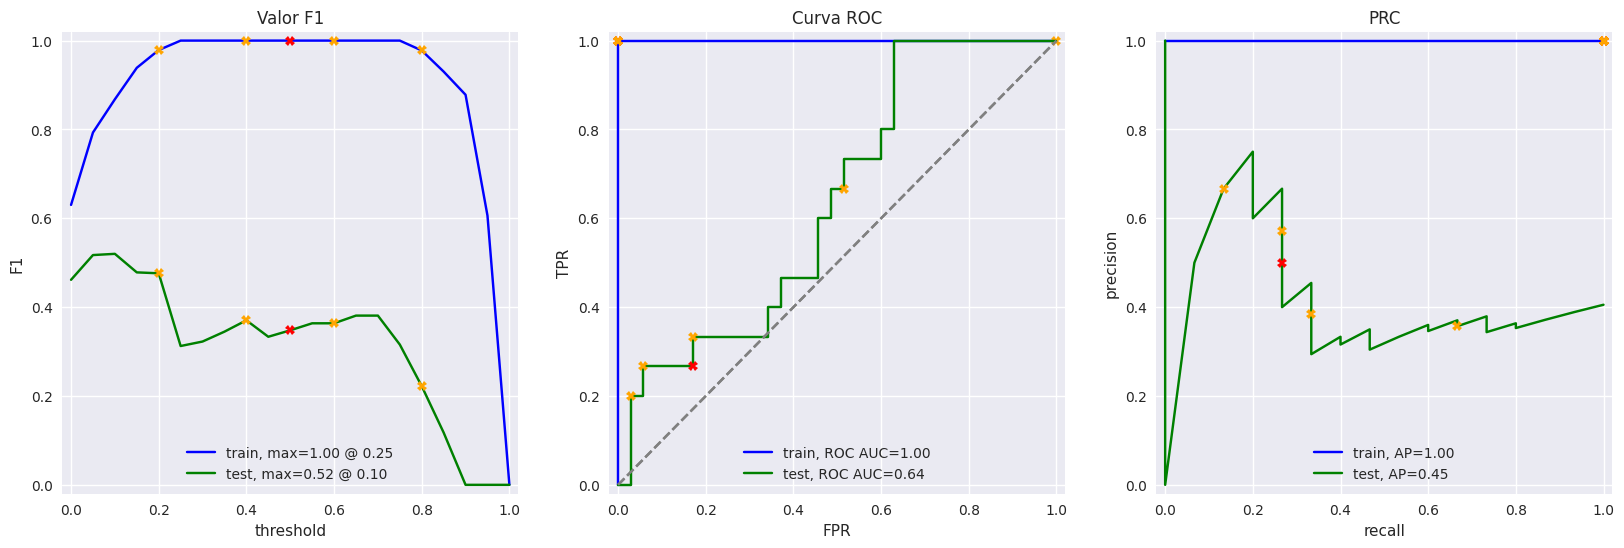

In [66]:
evaluate_model(model_9, train_features_9, train_target_bert, test_features_9, test_target_bert)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente trabajo Oscar! Incluiste varios tipos de preproceso e incluso lograste utilizar BERT, muy bien!

</div>

## Mis reseñas

Comentarios 8.

Se presenta variable con nuevas reseñas.
Se aplican los cuatro modelos antes presentados a las nuevas reseñas considerando la probabilidad de predicción de reseñas positivas para cada caso.
El modelo 9 relativo a el proceso BERT, por los motivos comentados muestra valores más bajos en comparación a los otros 3 modelos.

In [67]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

#my_reviews['review_norm'] = ...# <escribe aquí la misma lógica de normalización que para el conjunto de datos principal>

#my_reviews

"\nmy_reviews = pd.DataFrame([\n    'Simplemente no me gustó, no es mi tipo de película.',\n    'Bueno, estaba aburrido y me quedé dormido a media película.',\n    'Estaba realmente fascinada con la película',    \n    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',\n    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',\n    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',\n    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',\n    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'\n], columns=['review'])\n"

In [68]:
my_reviews

,review
0,"I did not simply like it, not my kind of movie."
1,"Well, I was bored and felt asleep in the middl..."
2,I was really fascinated with the movie
3,Even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...
5,"The movie had its upsides and downsides, but I..."
6,What a rotten attempt at a comedy. Not a singl...
7,Launching on Netflix was a brave move & I real...


In [69]:
my_corpus_clean = my_reviews['review'].apply(text_cleaning)

In [70]:
my_reviews['review_norm'] = my_corpus_clean # <escribe aquí la misma lógica de normalización que para el conjunto de datos principal>

In [71]:
my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",ell was bored and felt asleep in the middle of...
2,I was really fascinated with the movie,was really fascinated with the movie
3,Even the actors looked really old and disinter...,ven the actors looked really old and disintere...
4,I didn't expect the reboot to be so good! Writ...,didn't expect the reboot to be so good riters ...
5,"The movie had its upsides and downsides, but I...",he movie had its upsides and downsides but fee...
6,What a rotten attempt at a comedy. Not a singl...,hat a rotten attempt at a comedy ot a single j...
7,Launching on Netflix was a brave move & I real...,aunching on etflix was a brave move really app...


### Modelo 1

In [72]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(count_tf_idf_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  did not simply like it not my kind of movie
0.07:  ell was bored and felt asleep in the middle of the movie
0.58:  was really fascinated with the movie
0.28:  ven the actors looked really old and disinterested and they got paid to be in the movie hat a soulle
0.37:  didn't expect the reboot to be so good riters really cared about the source material
0.49:  he movie had its upsides and downsides but feel like overall it's a decent flick could see myself go
0.11:  hat a rotten attempt at a comedy ot a single joke lands everyone acts annoying and loud even kids wo
0.92:  aunching on etflix was a brave move really appreciate being able to binge on episode after episode o


### Modelo 3

In [73]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  did not simply like it not my kind of movie
0.08:  ell was bored and felt asleep in the middle of the movie
0.49:  was really fascinated with the movie
0.21:  ven the actors looked really old and disinterested and they got paid to be in the movie hat a soulle
0.34:  didn't expect the reboot to be so good riters really cared about the source material
0.50:  he movie had its upsides and downsides but feel like overall it's a decent flick could see myself go
0.05:  hat a rotten attempt at a comedy ot a single joke lands everyone acts annoying and loud even kids wo
0.95:  aunching on etflix was a brave move really appreciate being able to binge on episode after episode o


### Modelo 4

In [74]:
texts = my_reviews['review_norm']

#tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(count_tf_idf_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.59:  did not simply like it not my kind of movie
0.32:  ell was bored and felt asleep in the middle of the movie
0.60:  was really fascinated with the movie
0.45:  ven the actors looked really old and disinterested and they got paid to be in the movie hat a soulle
0.73:  didn't expect the reboot to be so good riters really cared about the source material
0.73:  he movie had its upsides and downsides but feel like overall it's a decent flick could see myself go
0.26:  hat a rotten attempt at a comedy ot a single joke lands everyone acts annoying and loud even kids wo
0.79:  aunching on etflix was a brave move really appreciate being able to binge on episode after episode o


### Modelo 9

In [75]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.03:  did not simply like it not my kind of movie
0.07:  ell was bored and felt asleep in the middle of the movie
0.08:  was really fascinated with the movie
0.06:  ven the actors looked really old and disinterested and they got paid to be in the movie hat a soulle
0.01:  didn't expect the reboot to be so good riters really cared about the source material
0.14:  he movie had its upsides and downsides but feel like overall it's a decent flick could see myself go
0.01:  hat a rotten attempt at a comedy ot a single joke lands everyone acts annoying and loud even kids wo
0.18:  aunching on etflix was a brave move really appreciate being able to binge on episode after episode o


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con los test de estos reviews

</div>

## Conclusiones

Aunado a las conclusiones de cada apartado y partiendo del enfoque en el trabajo de predicción mediante datos de texto, se puede apreciar la complejidad de dichos procesos y las herramientas que pueden ser útiles para ello. Apreciar el funcionamiento y en casos mejorar los desempeños en cuanto normalización de los textos así como las mejoras propias que puedan tener los modelos entrenados.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien! La implementación de modelos está bien organizada y sigue una progresión lógica desde modelos base hasta enfoques más avanzados como el uso de `LGBM` y `BERT`. El uso de `TF-IDF` en combinación con `spaCy` es una excelente estrategia para mejorar la representación del texto y fortalecer el desempeño de los modelos. También es positivo que cada modelo sea evaluado de manera uniforme utilizando la función `evaluate_model()`, lo que permite una comparación clara entre los diferentes enfoques.

</div>

# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código 
- [ ]  Hay conclusiones 